In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_profiling
import os

In [2]:
curr_dir= os.getcwd()

In [3]:
train = pd.read_csv(curr_dir+"/train.tsv", sep='\t')
test = pd.read_csv(curr_dir+"/test.tsv",sep='\t')

In [10]:
train.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


In [11]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [4]:
train.info()
print("------------------------------------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
test_id              693359 non-null int64
name                 693359 non-null object
item_condition_id    693359 non-null int64
category_name        690301 non-null object
brand_name           397834 non-null object
shipping             693359 non-null int64
item_description     693359 non-null object
dtypes: in

In [7]:
print(train.isnull().sum())
print ("---------------------------")
test.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64
---------------------------


test_id                   0
name                      0
item_condition_id         0
category_name          3058
brand_name           295525
shipping                  0
item_description          0
dtype: int64

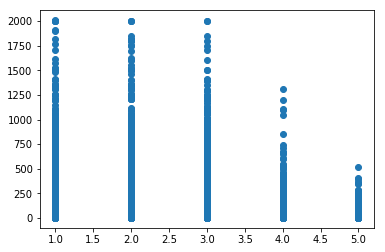

In [12]:
plt.scatter(train['item_condition_id'],train['price'])
plt.show()

In [52]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate


In [ ]:
algo = SVD()

cross_validate(algo, train, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [54]:
train['name'].describe()

count     1482535
unique    1225273
top        Bundle
freq         2232
Name: name, dtype: object

In [59]:
tr_bundle= train[train.name == 'Bundle']

In [63]:
tr_bundle['brand_name'].describe()

count     1006
unique     251
top       PINK
freq       118
Name: brand_name, dtype: object

In [71]:
tr_bundle_pink = tr_bundle[tr_bundle.brand_name == 'PINK']

In [72]:
tr_bundle_pink_sh = tr_bundle_pink[tr_bundle.shipping ==0]

C:\Users\tidyq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [95]:
tr_bundle_pink_sh_cate

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
22916,22916,Bundle,3,Women/Tops & Blouses/T-Shirts,PINK,10.0,0,Bundle . Tank and hat . For ICess
42289,42289,Bundle,3,Women/Sweaters/Hooded,PINK,46.0,0,Vs sweater Swim top-free Vs cut sleeve top Dre...
59605,59605,Bundle,2,Women/Sweaters/Full Zip,PINK,24.0,0,On hold bundle
76939,76939,Bundle,1,Women/Athletic Apparel/Shirts & Tops,PINK,69.0,0,White tank(xs) and pants (s) for Alex
96296,96296,Bundle,3,Women/Sweaters/Hooded,PINK,36.0,0,Vs love pink hoodie black size medium and wome...
98414,98414,Bundle,1,Women/Athletic Apparel/Tracksuits & Sweats,PINK,134.0,0,"Sweats, two dresses, eyeshadow set, giftcard, ..."
100246,100246,Bundle,3,"Women/Tops & Blouses/Tank, Cami",PINK,15.0,0,Victoria secret pink shirt Open back style. Si...
113759,113759,Bundle,1,Women/Tops & Blouses/T-Shirts,PINK,24.0,0,Gray marled short sleeve. V neck tee new with tag
121795,121795,Bundle,1,Women/Tops & Blouses/T-Shirts,PINK,126.0,0,Includes: 2 PINK VS Hoodies 1 PINK VS Half Zip...
133752,133752,Bundle,1,Women/Underwear/Panties,PINK,24.0,0,4 Panties [rm]


In [97]:
tr_bundle_pink_sh['category_name'].describe()

count                                80
unique                               20
top       Women/Tops & Blouses/T-Shirts
freq                                 18
Name: category_name, dtype: object

In [98]:
tr_bundle_pink_sh_cat = tr_bundle_pink_sh[tr_bundle_pink_sh.category_name == 'Women/Tops & Blouses/T-Shirts']

In [99]:
tr_bundle_pink_sh_cat

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
22916,22916,Bundle,3,Women/Tops & Blouses/T-Shirts,PINK,10.0,0,Bundle . Tank and hat . For ICess
113759,113759,Bundle,1,Women/Tops & Blouses/T-Shirts,PINK,24.0,0,Gray marled short sleeve. V neck tee new with tag
121795,121795,Bundle,1,Women/Tops & Blouses/T-Shirts,PINK,126.0,0,Includes: 2 PINK VS Hoodies 1 PINK VS Half Zip...
257108,257108,Bundle,2,Women/Tops & Blouses/T-Shirts,PINK,20.0,0,So comfortable!!
380167,380167,Bundle,1,Women/Tops & Blouses/T-Shirts,PINK,79.0,0,All 3 bundled.
655009,655009,Bundle,3,Women/Tops & Blouses/T-Shirts,PINK,26.0,0,VS Pink olive green loose fit shirt. No stains...
722961,722961,Bundle,1,Women/Tops & Blouses/T-Shirts,PINK,66.0,0,Long sleeve with bling all over. Super cute!!!
737987,737987,Bundle,3,Women/Tops & Blouses/T-Shirts,PINK,37.0,0,Victoria secret pink backpack In good used con...
755288,755288,Bundle,3,Women/Tops & Blouses/T-Shirts,PINK,25.0,0,4 items :)
783158,783158,Bundle,3,Women/Tops & Blouses/T-Shirts,PINK,15.0,0,Pink shirt and sweats


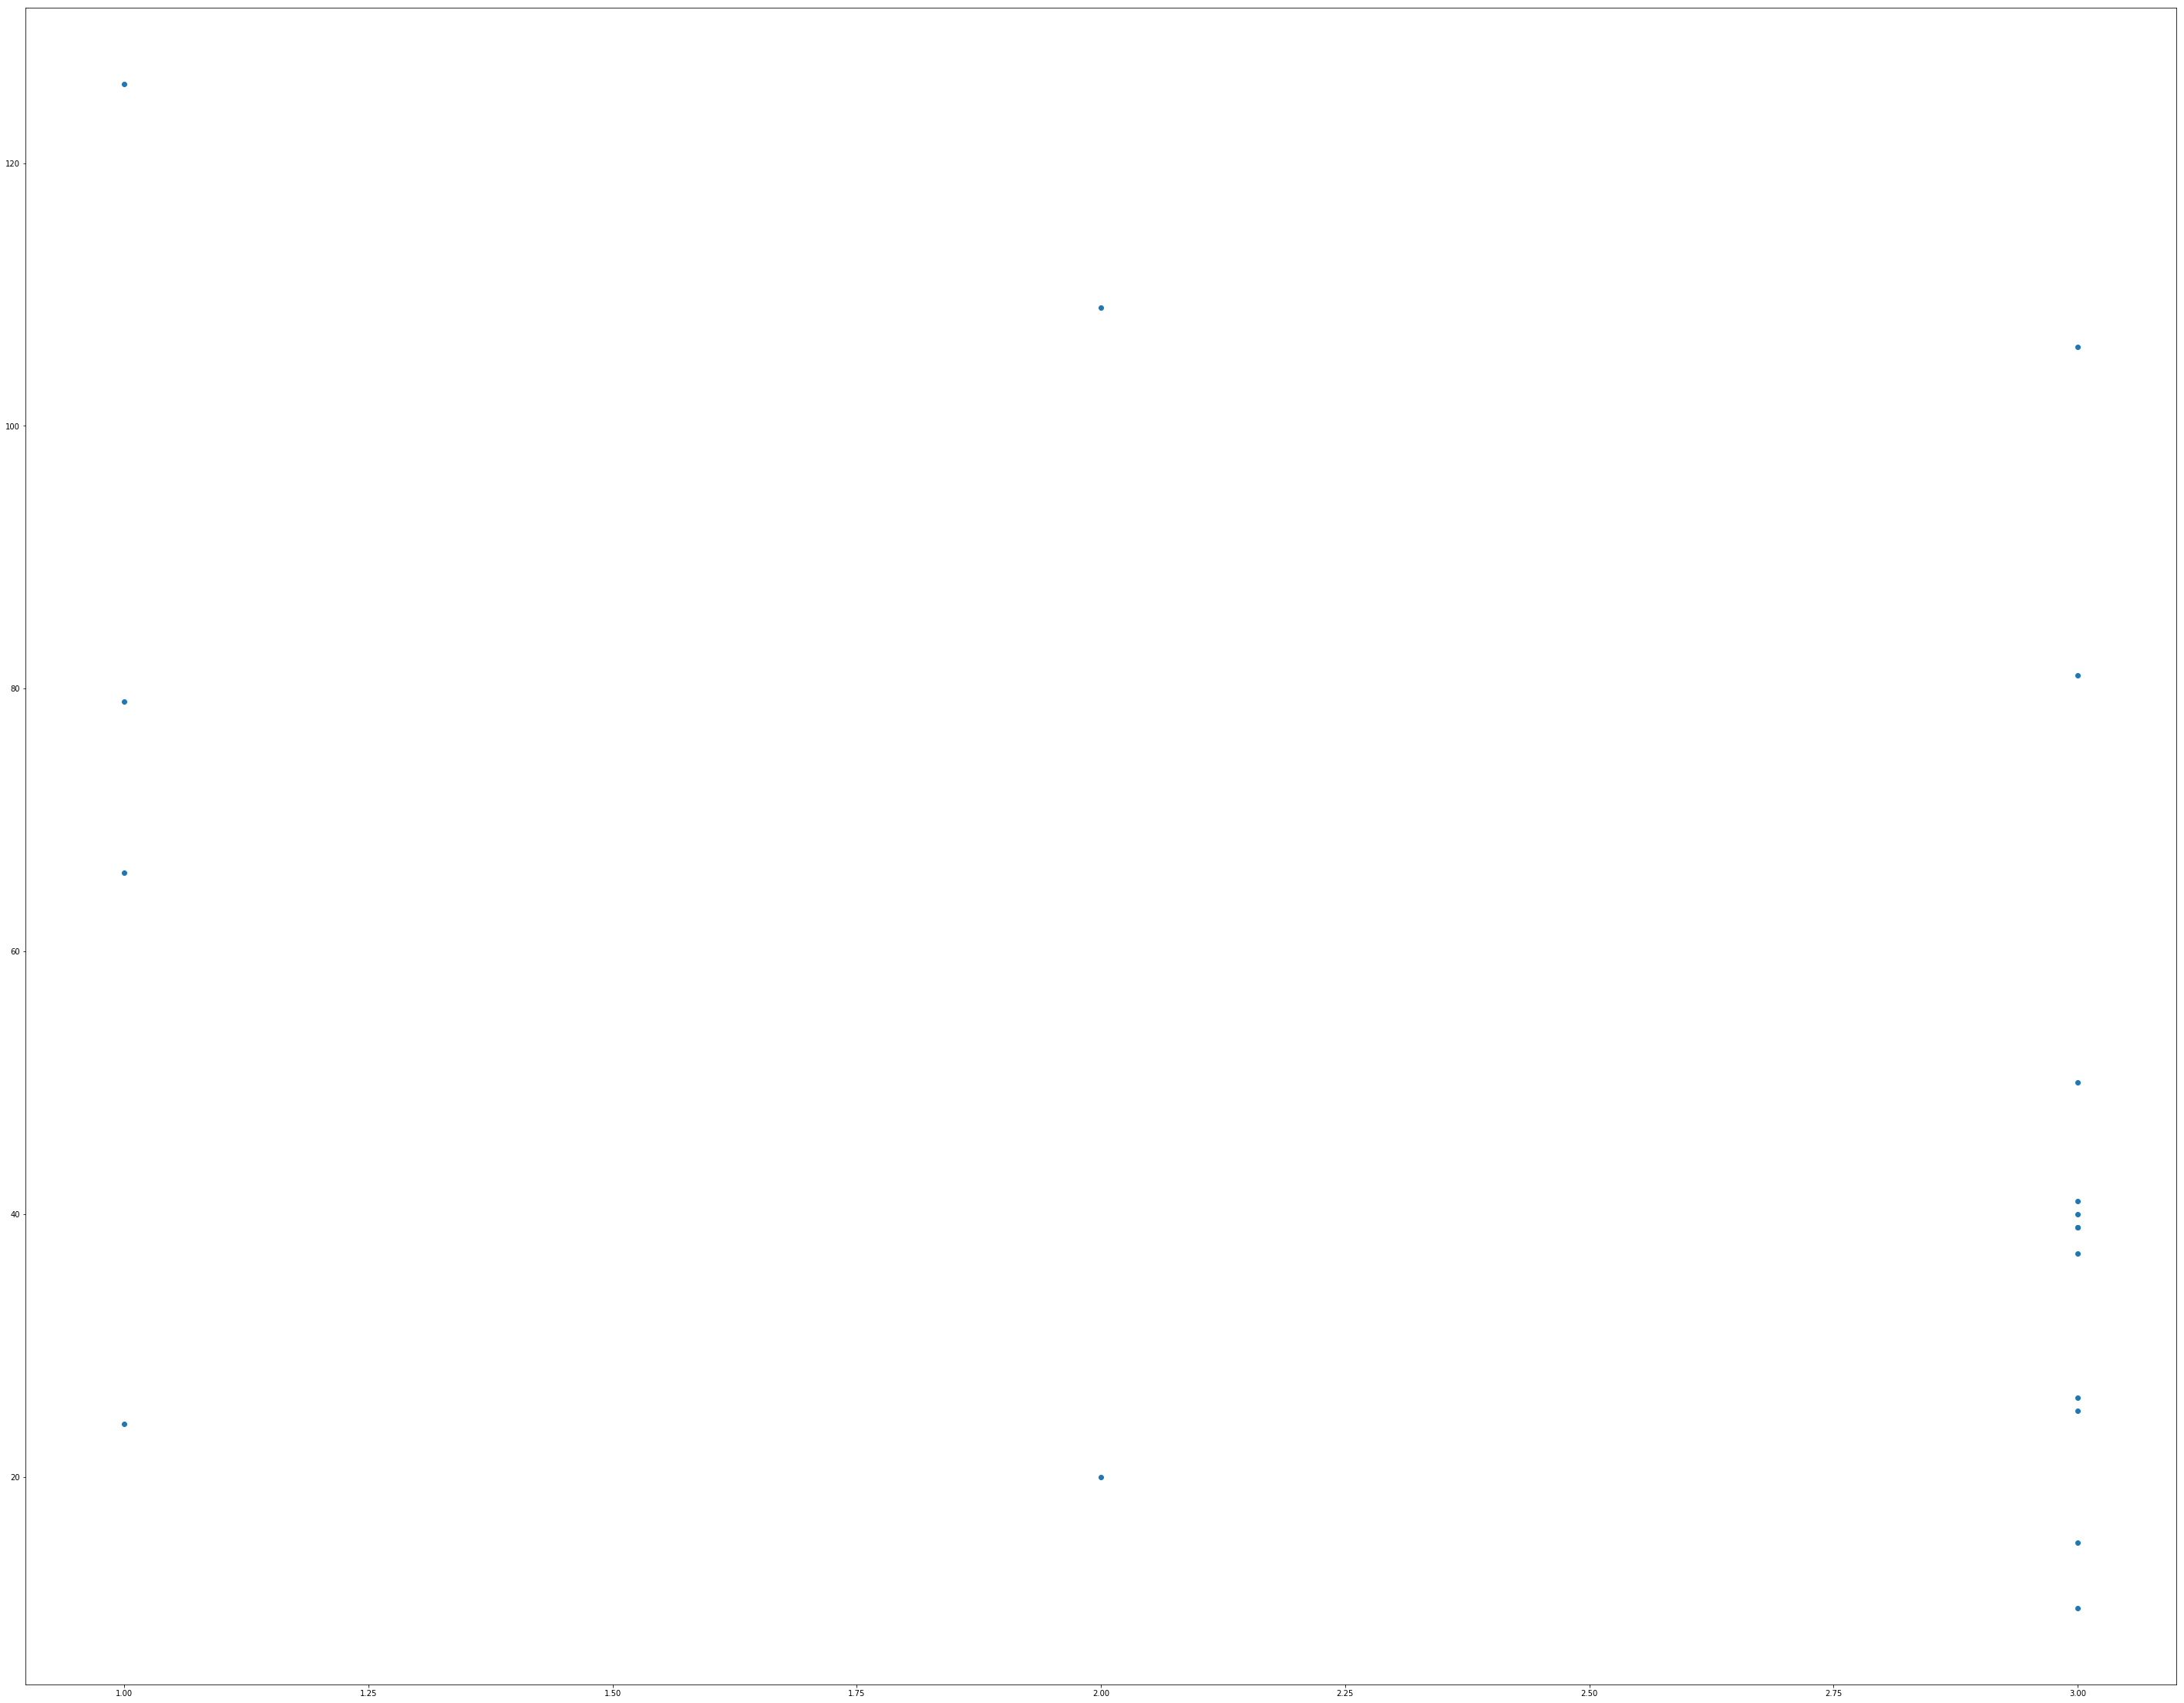

In [105]:
plt.scatter(tr_bundle_pink_sh_cat['item_condition_id'],tr_bundle_pink_sh_cat['price'])
plt.rcParams['figure.figsize']=(1,40)
plt.show()

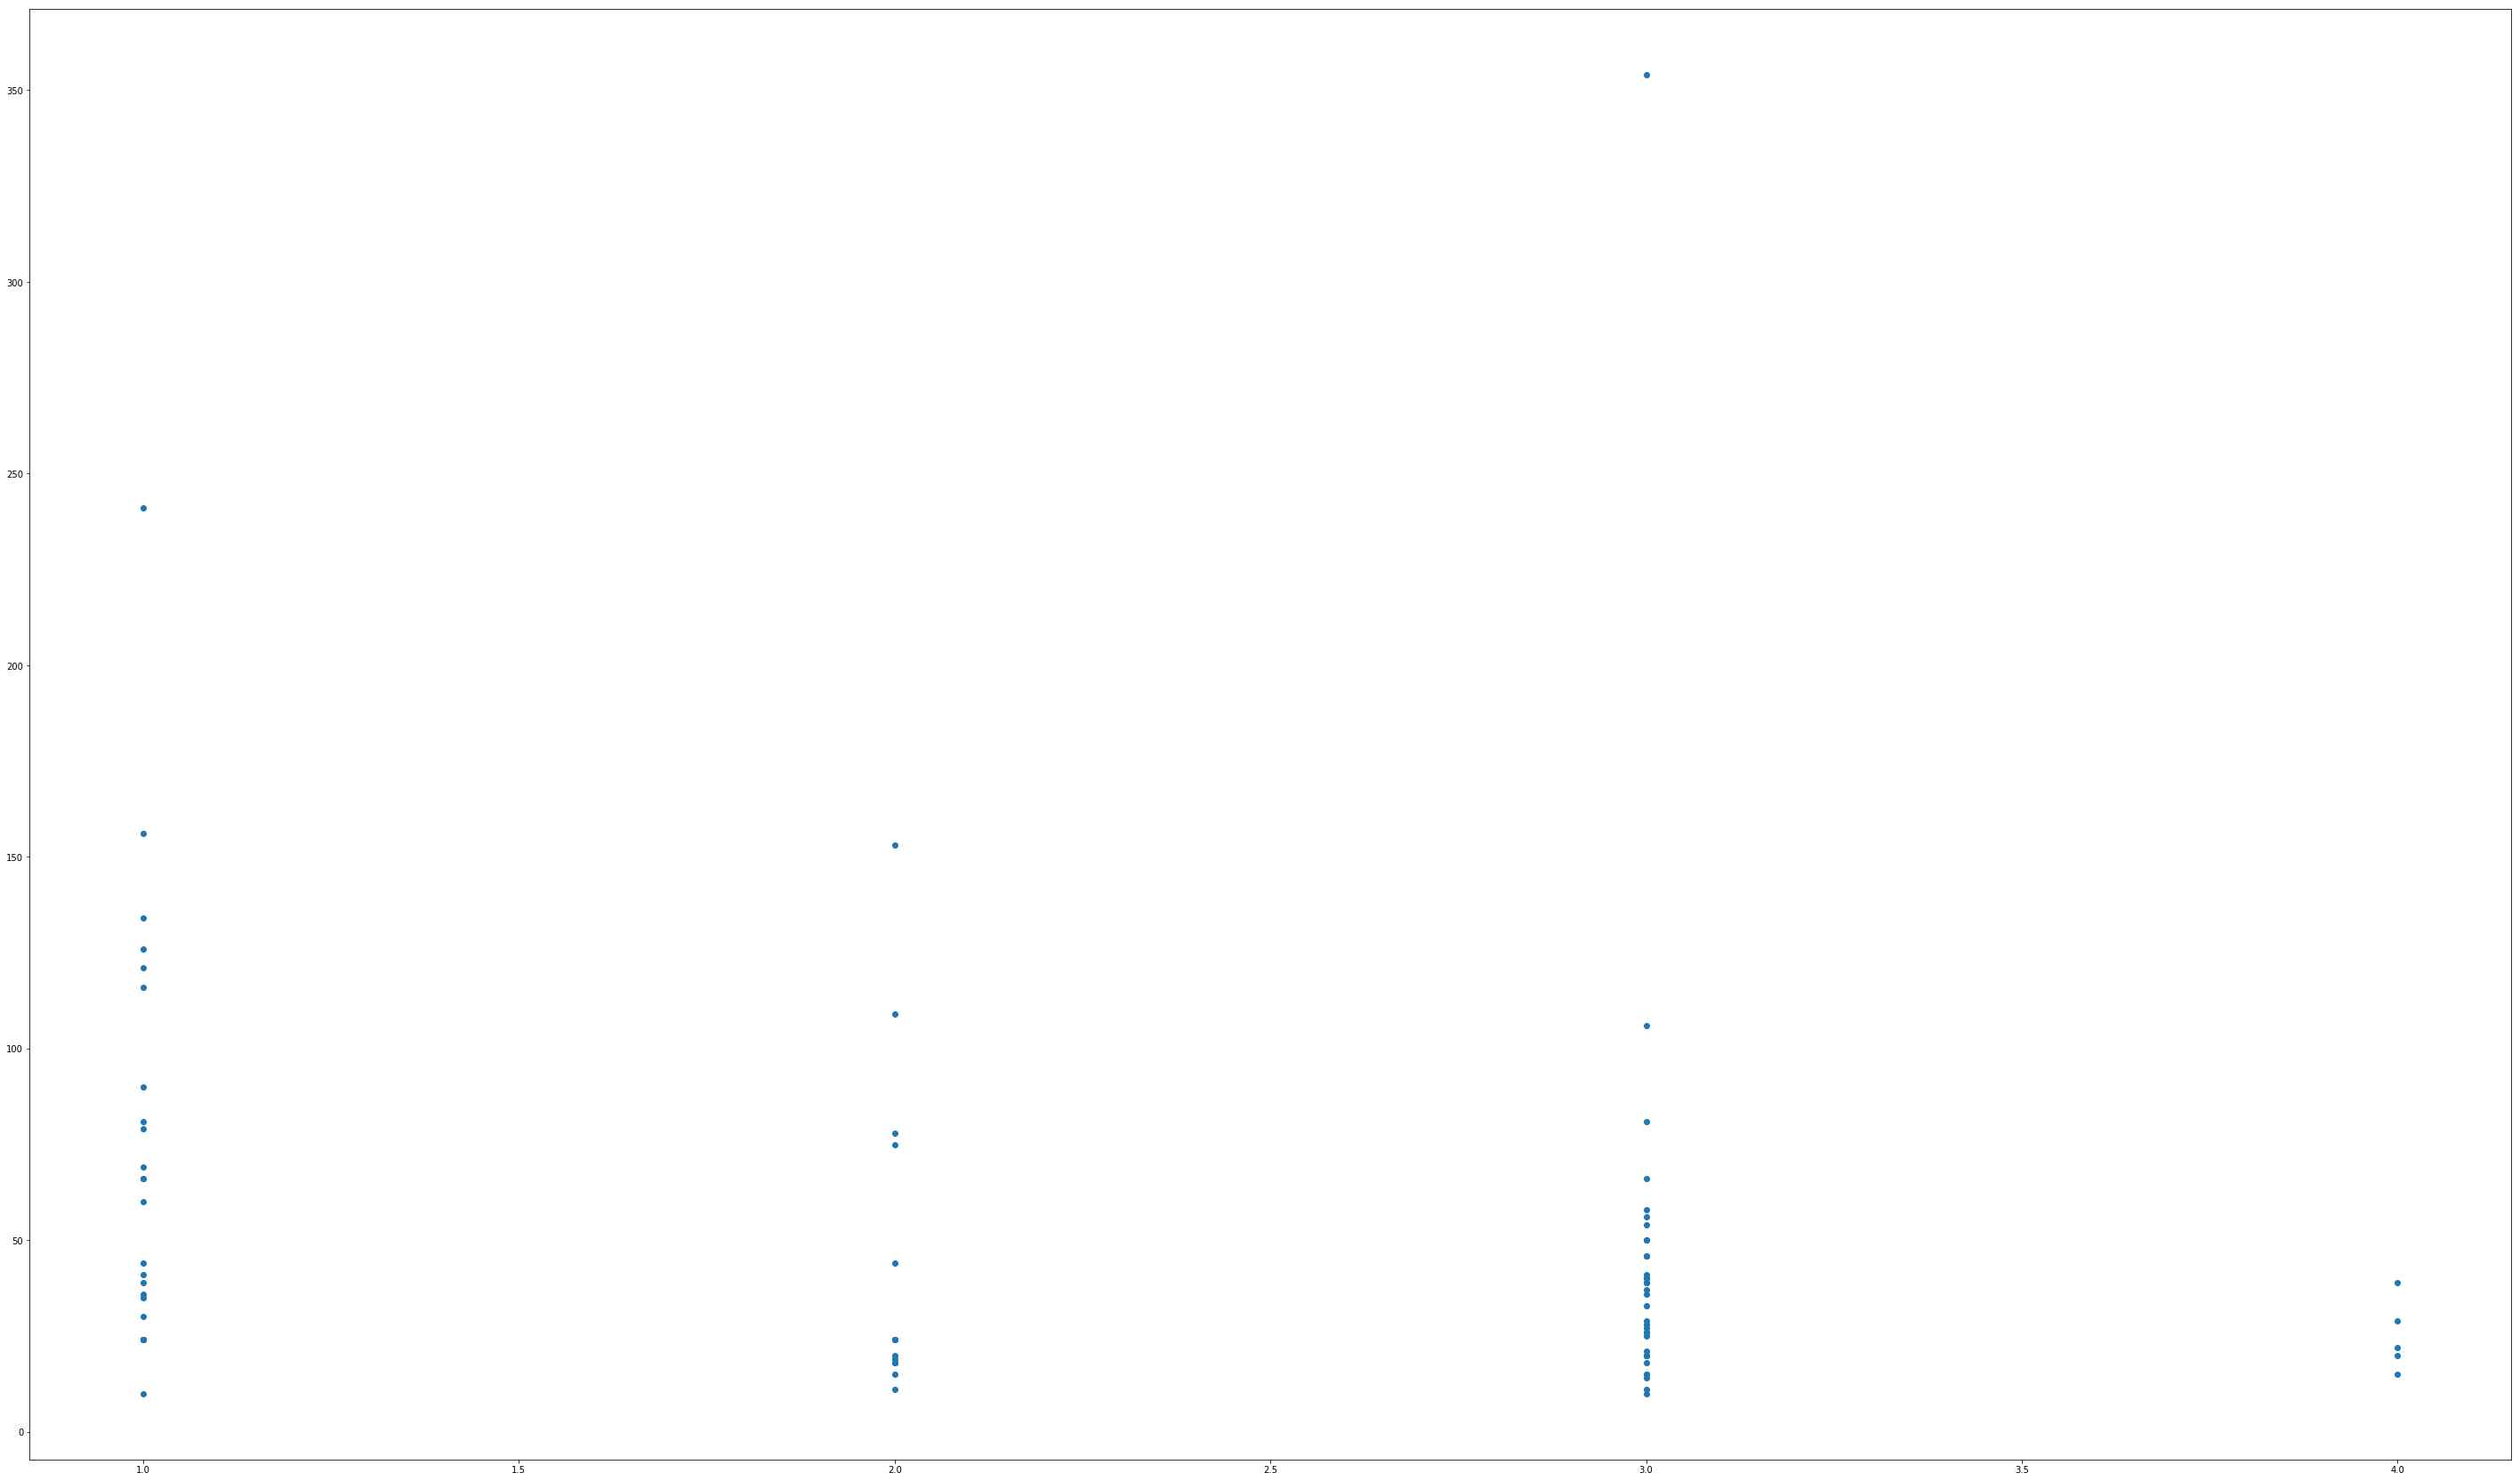

In [94]:
plt.scatter(tr_bundle_pink_sh['item_condition_id'],tr_bundle_pink_sh['price'])
plt.rcParams['figure.figsize']=(20,30)
plt.show()

In [106]:
from nltk.tokenize import RegexpTokenizer

In [107]:
tokenizer = RegexpTokenizer(r'\w+')

In [110]:
tokenizer.tokenize(tr_bundle_pink_sh_cat.item_condition_id.iloc[0])

TypeError: cannot use a string pattern on a bytes-like object

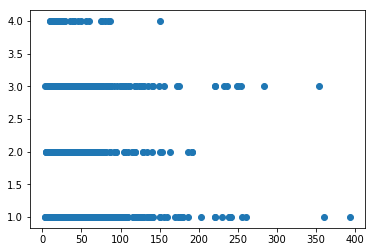

In [62]:
plt.scatter(tr_bundle['price'],tr_bundle['item_condition_id'])
plt.show()

In [47]:
tr_pink.groupby('name')['name'].nunique().sort_values()

name
! Victoria's Secret PINK thong panty         1
VS Pink L Strappy Bralette                   1
VS Pink L gym pant                           1
VS Pink L, M Raglan Pullover Hoodie          1
VS Pink L/S Black Hoodie Size Small          1
VS Pink L/S tee                              1
VS Pink L/S tee shirt M [rm]                 1
VS Pink L/Saturday Campus Tee - Medium       1
VS Pink L Raglan Pullover Hoodie             1
VS Pink LARGE Campus Legging Rainbow [rm]    1
VS Pink Lace Boyshort Bundle (5) NWT         1
VS Pink Lace Bralette                        1
VS Pink Lace Bralette (NWT) free ship.       1
VS Pink Lace Bralette NWT M & Panty S        1
VS Pink Lace Date Push Up Bra                1
VS Pink Lace Push-up                         1
VS Pink Lace Racerback Brallette & panty     1
VS Pink LARGE Cotton Sports Bra NEW          1
VS Pink Lace T shirt Bra 34B                 1
VS Pink L Panty, VS Bra                      1
VS Pink L Outfit and Bra Set                 1
VS Pink 

In [51]:
tr_pink.groupby('item_condition_id')['name'].nunique().sort_values()

item_condition_id
5       26
4     1097
2    11501
3    13302
1    18796
Name: name, dtype: int64

In [28]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [37]:
features = ['test_id','item_condition_id','shipping']
clf.fit(trainfeatures,train['price'])

AttributeError: 'DataFrame' object has no attribute 'features'